# Задание 2

Реализуйте функцию $f(x1,x2) = NOT( {x_1} XOR {x_2})$


In [ ]:
!pip install matplotlib

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## Решение

| $q₀$ | $q₁$ | $CNOT(q₀, q₁)$ | $NOT(CNOT(q₀, q₁))$ | $f(q₀, q₁)$ |
|------|------|----------------|---------------------|-------------|
| 0    | 0    | 0              | 1                   | 1           |
| 0    | 1    | 1              | 0                   | 0           |
| 1    | 0    | 1              | 0                   | 0           |
| 1    | 1    | 0              | 1                   | 1           |

Таким образом, $f(q0,q1)=NOT(CNOT(q0,q1))$

In [3]:
def build_circuit(initial_state):
    inputs = QuantumRegister(2, 'q')
    output = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(inputs, output)
    circuit.initialize(initial_state, [inputs[0], inputs[1]]) 
    circuit.cx(inputs[0], inputs[1])
    circuit.x(inputs[1])
    circuit.measure(inputs[1], output[0])
    return circuit

def initialize(x1, x2):
    if x1 == 0 and x2 == 0:
        return [1, 0, 0, 0]  # |00>
    if x1 == 0 and x2 == 1:
        return [0, 1, 0, 0]  # |01>
    if x1 == 1 and x2 == 0:
        return [0, 0, 1, 0]  # |10>
    return [0, 0, 0, 1]  # |11>
    

## Пример работы
Входные данные -- $x_0, x_1$ 

In [4]:
x1, x2 = 1, 0

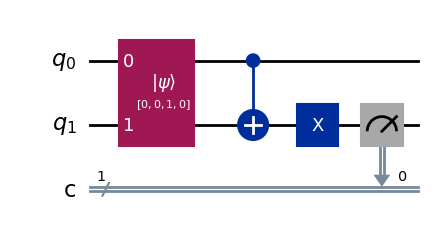

In [10]:
initial_state = initialize(x1, x2)
circuit = build_circuit(initial_state)
circuit.draw('mpl')

## Теперь произведем симуляцию

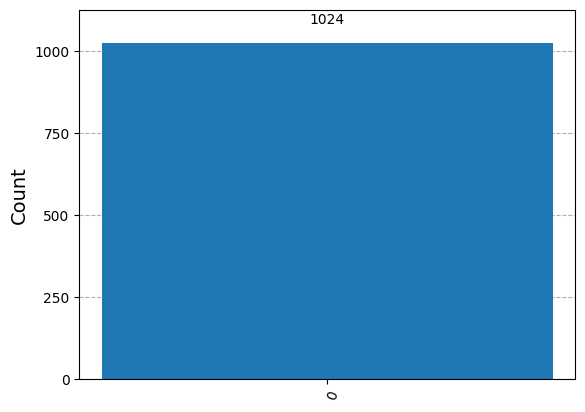

In [9]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit,shots=1024).result()
plot_histogram(result.get_counts())
